# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O macd_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/macd_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' macd_crossover.py

In [5]:
from macd_crossover import MACDCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135440,
 'strategyId': '953d986296d84292b3d2d4c5f75eef5e'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('CDSL', exchange='NSE')
instrument

[{'id': 126, 'value': 'NSE:CDSL'},
 {'id': 875194, 'value': 'NSE:CDSL.BE'},
 {'id': 2174529, 'value': 'NSE:CDSL.BL'},
 {'id': 711363, 'value': 'NSE:ICDSLTD.BE'}]

## Setup Parameters

In [9]:
parameters = {
  'TIMEPERIOD_FAST': 12,
  'TIMEPERIOD_SIGNAL': 9,
  'TIMEPERIOD_SLOW': 26
}

In [10]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530',
    instrument='NSE:CDSL', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'MACD Crossover' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                                  │
╞═════════════════════════╪════════════════════════════════════════════════════════════════════════╡
│ Strategy Name           │ MACD Crossover                                                         │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                            │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:CDSL']                                                           │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[BT] [2021-08-01 09:15:00,000] [WARNING] [utils] No historical data found for candle: 2021-08-01 09:15:00+05:30 for NSE_EQ:CDSL 
[BT] [2021-08-01 09:15:00,000] [INFO] [strategy] 
####################
Strategy Parameters:
StrategyParameters([('TIMEPERIOD_FAST', 12),
                    ('TIMEPERIOD_SIGNAL', 9),
                    ('TIMEPERIOD_SLOW', 26)])
####################
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] Not launching PNL tracker...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] Opening current intraday positions, if any...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] Not processing holdings as STRATEGY_MODE is INTRADAY
[BT] [2021-08-01 09:15:00,000] [WARNING] [utils] No historical data found for candle: 2021-08-01 09:15:00+05:30 for NSE_EQ:CDSL 
[BT] [2021-08-01 09:15:00,000] [INFO] [utils] Crossover Details:
         #        val1        val2
(PREVIOUS)       -9.99      -14.07
  (LATEST)       -9.63      -13.18
[BT] [2021-08-01 09:15:00,000] [INFO] [utils] Crossover: Did n

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,CDSL,2021-08-04 13:15:00+05:30,SELL,2,₹,1356.95,2021-08-04 15:30:00+05:30,BUY,2,₹,1330.00,53.9,53.9,0,53.9
1,NSE,CDSL,2021-08-06 10:15:00+05:30,BUY,2,₹,1346.00,2021-08-06 13:15:00+05:30,SELL,2,₹,1333.00,-26.0,27.9,0,-26.0
2,NSE,CDSL,2021-08-06 13:15:00+05:30,SELL,2,₹,1333.00,2021-08-06 14:15:00+05:30,BUY,2,₹,1339.00,-12.0,15.9,0,-12.0
3,NSE,CDSL,2021-08-06 14:15:00+05:30,BUY,2,₹,1339.00,2021-08-06 15:15:00+05:30,SELL,2,₹,1336.10,-5.8,10.1,0,-5.8
4,NSE,CDSL,2021-08-06 15:15:00+05:30,SELL,2,₹,1336.10,2021-08-06 15:30:00+05:30,BUY,2,₹,1336.10,0.0,10.1,0,0.0
5,NSE,CDSL,2021-08-10 09:15:00+05:30,BUY,2,₹,1315.80,2021-08-10 10:15:00+05:30,SELL,2,₹,1295.95,-39.7,-29.6,0,-39.7
6,NSE,CDSL,2021-08-10 10:15:00+05:30,SELL,2,₹,1295.95,2021-08-10 15:30:00+05:30,BUY,2,₹,1280.00,31.9,2.3,0,31.9
7,NSE,CDSL,2021-08-16 09:15:00+05:30,BUY,2,₹,1250.00,2021-08-16 10:15:00+05:30,SELL,2,₹,1233.00,-34.0,-31.7,0,-34.0
8,NSE,CDSL,2021-08-16 10:15:00+05:30,SELL,2,₹,1233.00,2021-08-16 13:15:00+05:30,BUY,2,₹,1230.90,4.2,-27.5,0,4.2
9,NSE,CDSL,2021-08-16 13:15:00+05:30,BUY,2,₹,1230.90,2021-08-16 15:30:00+05:30,SELL,2,₹,1230.00,-1.8,-29.3,0,-1.8


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-04
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      86.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              1.36
Prob. Sharpe Ratio  90.3%
Sortino             2.61
Sortino/√2          1.84
Omega               1.34

Max Drawdown        -0.0%
Longest DD Days     341

Gain/Pain Ratio     0.37
Gain/Pain (1M)      1.2

Payoff Ratio        1.46
Profit Factor       1.34
Common Sense Ratio  2.05
CPC Index           0.93
Tail Ratio          1.53
Outlier Win Ratio   6.58
Outlier Loss Ratio  3.4

MTD                 -0.0%
3M                  -0.0%
6M                  -0.0%
YTD                 -0.0%
1Y                  -0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  44
Recovery Factor     1.5
Ulcer Index         0.0
Serenity Index      0.26


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-04
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             86.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     1.36
Prob. Sharpe Ratio         90.3%
Smart Sharpe               1.14
Sortino                    2.61
Smart Sortino              2.19
Sortino/√2                 1.84
Smart Sortino/√2           1.55
Omega                      1.34

Max Drawdown               -0.0%
Longest DD Days            341
Volatility (ann.)          0.0%
Calmar                     0.75
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            12.0%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       6
Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-08-24,2023-07-03,2023-07-31,341,-0.000037,-0.000036
2,2021-11-03,2021-11-09,2021-11-30,27,-0.000015,-0.000015
3,2022-03-28,2022-04-20,2022-05-02,34,-0.000011,-0.000009
4,2021-12-08,2022-01-06,2022-01-13,35,-0.000009,-0.000009
5,2022-07-11,2022-08-03,2022-08-12,32,-0.000009,-0.000009


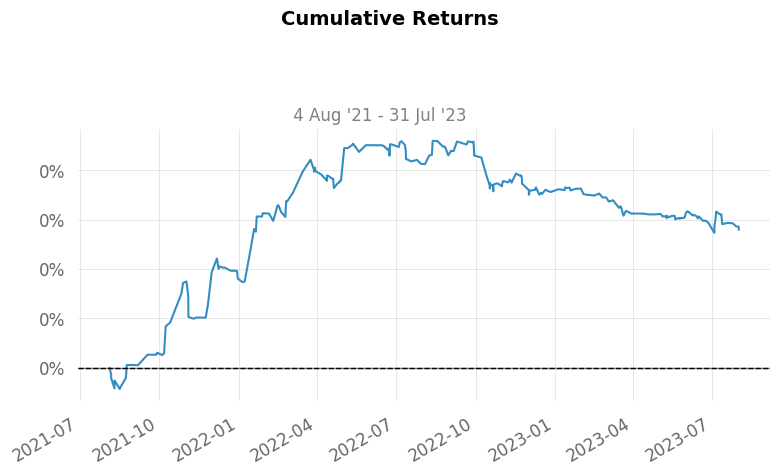

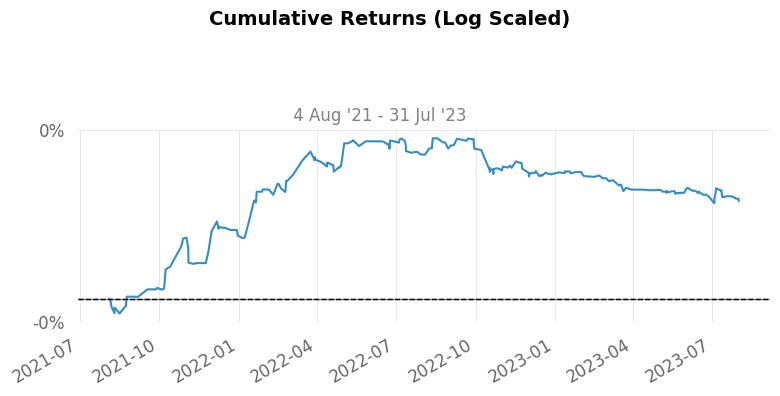

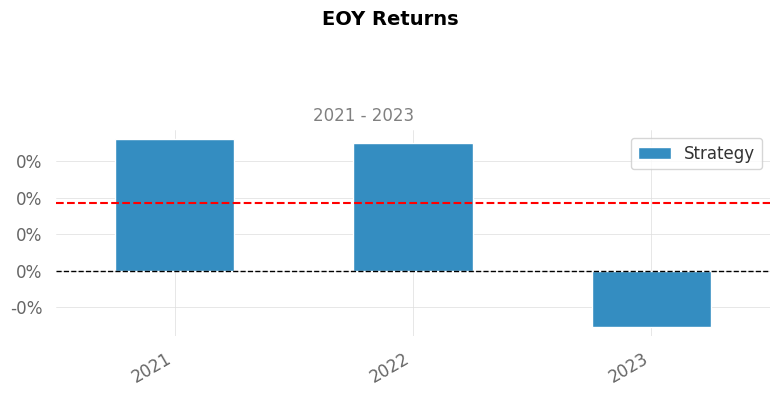

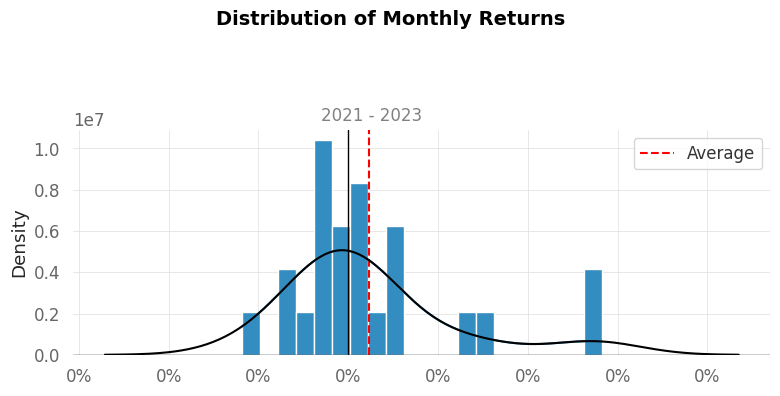

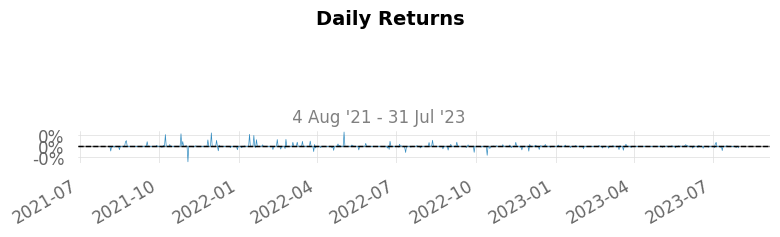

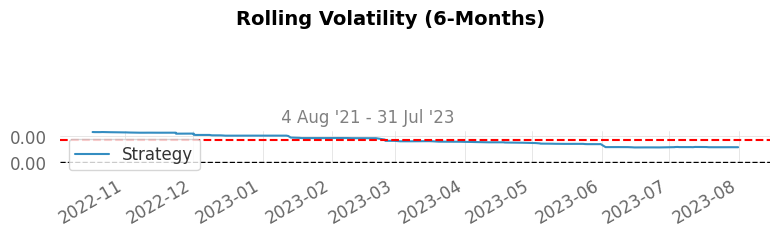

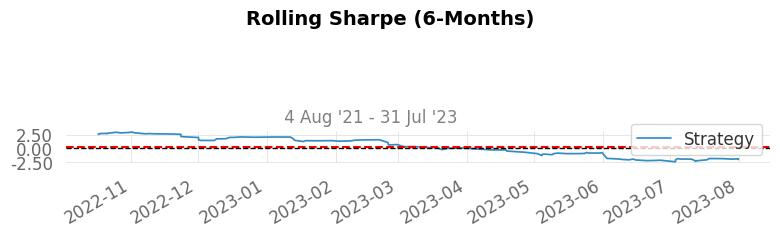

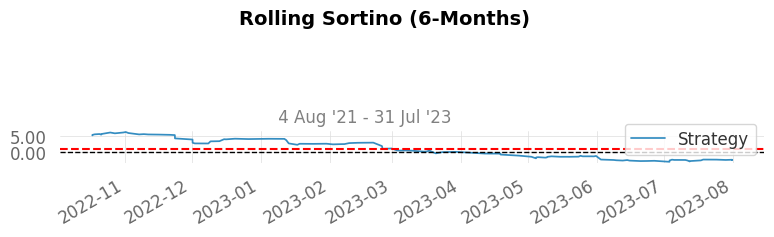

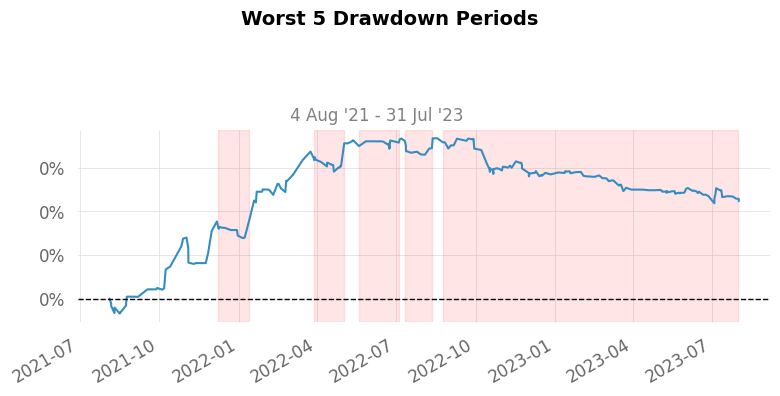

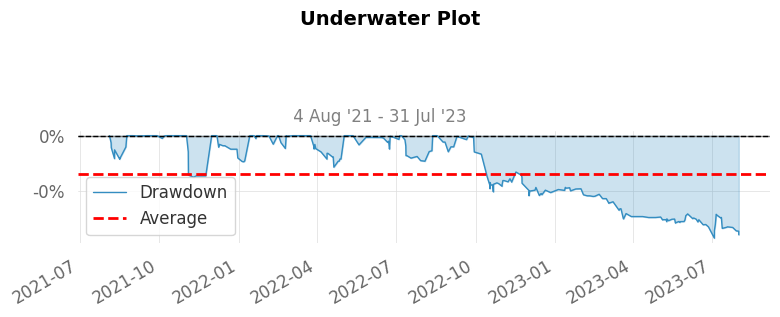

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


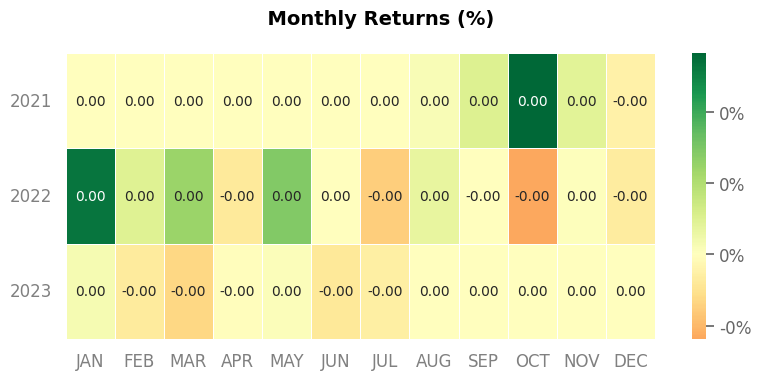

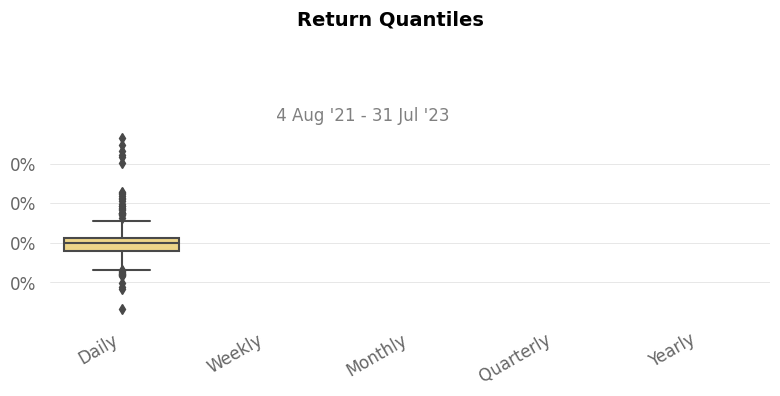

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | bd420ab962b04364abd2e328b5652dc6 |
| Transaction Type | SELL                             |
| Instrument       | NSE:CDSL                         |
| Quantity         | 2                                |
| Price            | ₹1231.15                         |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:27:25.363148Z | COMPLETE               |
| 2023-10-23T13:27:25.363130Z | OPEN                   |
| 2023-10-23T13:27:25.363110Z | OPEN PENDING           |
| 2023-10-23T13:27:25.363088Z | VALIDATION PENDING     |
| 2023-10-23T13:27:25.363018Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | b3a54467cd564065b

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---